# Get Immutable Reference Benchmarks

In [1]:
# select measurement file
#file_name = "../output/2024-05-22 10-14-20 get1.json"
file_name = "../output/2024-05-24 20-48-27 full.json"

# select style options
grey_fill_between = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [2]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [3]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML

# filter and convert data
get_min = filter(lambda item: item["bench_name"] == "get_min", raw_data)
get_max1 = filter(lambda item: item["bench_name"] == "get_max_1", raw_data)
get_max2 = filter(lambda item: item["bench_name"] == "get_max_2", raw_data)

# convert to mean + min + max data
def to_mmm_data(data):
    def convert_item(item):
        new = dict()
        new["mean"] = sum(item["data"]) / len(item["data"])
        new["min"] = min(item["data"])
        new["max"] = max(item["data"])

        for key in item["bench_options"]:
            new["options." + key] = item["bench_options"][key]
        
        for key in item:
            if key != "bench_options" and key != "data":
                new[key] = item[key]
        
        return new

    data = pd.DataFrame(list(map(convert_item, data)), columns=["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"])

    # make sure machine name, cold start and repetitions match
    if len(np.unique(data["cold_start"])) > 1 or len(np.unique(data["repetitions"])) > 1 or len(np.unique(data["machine_name"])) > 1:
        raise "values should be the same"

    return data

get_min = to_mmm_data(get_min)
get_max1 = to_mmm_data(get_max1)
get_max2 = to_mmm_data(get_max2)

display(HTML("<b>MIN Data:</b>"))
display(get_min.head())
display(HTML("<b>MAX Data V1:</b>"))
display(get_max1.head())
display(HTML("<b>MAX Data V2:</b>"))
display(get_max2.head())

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions
0,3.814,1,465,0,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
1,1.950,1,465,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
2,1.950,1,463,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
3,1.950,1,465,96,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
4,3.810,1,469,128,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500


,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions
0,749.262,424,888,0,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
1,2443.920,2443,2903,32,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
2,4705.108,4594,4870,64,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
3,6903.252,6903,7028,96,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
4,8029.082,7864,8733,128,0,65,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500


,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions
0,46908.992,46907,47902,0,996,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
1,48218.734,48209,49092,32,996,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
2,49927.716,49926,50784,64,996,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
3,51237.742,51233,52110,96,996,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500
4,52937.704,52936,53788,128,996,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,500


In [4]:

import pandas as pd
import numpy as np
from IPython.core.display import HTML

# filter and convert data
storage_read = filter(lambda item: item["bench_name"] == "persistent_storage_read", raw_data)
storage_write = filter(lambda item: item["bench_name"] == "persistent_storage_write", raw_data)

# convert to mean + min + max data
def to_mmm_data(data):
    def convert_item(item):
        new = dict()
        new["mean"] = sum(item["data"]) / len(item["data"])
        new["min"] = min(item["data"])
        new["max"] = max(item["data"])

        for key in item["bench_options"]:
            new["options." + key] = item["bench_options"][key]

        for key in item:
            if key != "bench_options" and key != "data":
                new[key] = item[key]

        return new

    data = pd.DataFrame(list(map(convert_item, data)), columns=["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])

    # make sure machine name, cold start and repetitions match
    if len(np.unique(data["cold_start"])) > 1 or len(np.unique(data["repetitions"])) > 1 or len(np.unique(data["machine_name"])) > 1:
        raise "values should be the same"

    return data

storage_read = to_mmm_data(storage_read)
storage_write = to_mmm_data(storage_write)

storage_read = storage_read.loc[storage_read["options.object_size"] <= get_min["options.object_size"].max()]
storage_write = storage_write.loc[storage_write["options.object_size"] <= get_min["options.object_size"].max()]

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,282.638,163,726,0,esp32c3,0,500
1,1664.226,1468,1961,32,esp32c3,0,500
2,2997.312,2974,3674,64,esp32c3,0,500
3,4495.534,4061,4966,96,esp32c3,0,500
4,5994.978,5978,6002,128,esp32c3,0,500


,mean,min,max,options.object_size,machine_name,cold_start,repetitions
0,397.272,243,696,0,esp32c3,0,500
1,1995.778,1904,1996,32,esp32c3,0,500
2,2995.966,2979,2996,64,esp32c3,0,500
3,4993.570,4296,4995,96,esp32c3,0,500
4,5994.940,5979,5995,128,esp32c3,0,500


In [5]:
import numpy as np

# configure gird size
grid_offset = 64

max_x = max(get_min["options.object_size"].max(), get_max1["options.object_size"].max())
if max_x % grid_offset != 0:
    max_x = (max_x / grid_offset) * grid_offset
    max_x += grid_offset

# set grid to be multiple of 16 (and 8)
major_ticks = np.arange(0, max_x + 1, grid_offset)
minor_ticks = np.arange(0, max_x + 1, grid_offset / 2)

Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

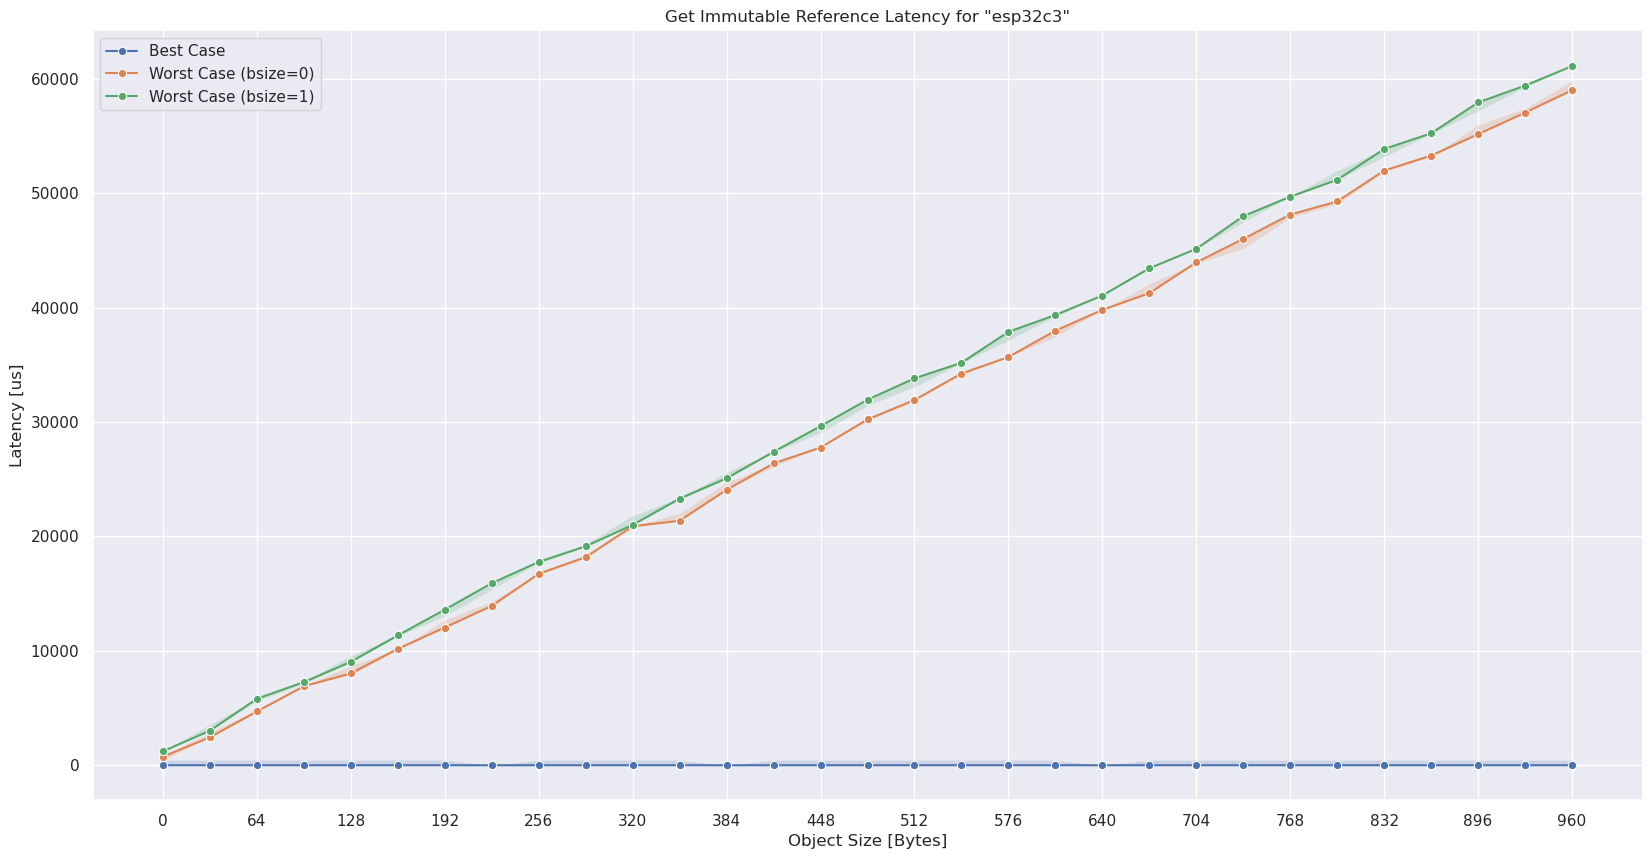

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

if len(get_min) != 0:
    sns.lineplot(ax=ax, data=get_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(get_min["options.object_size"], get_min["min"], get_min["max"], alpha=0.2, **fill_between_args)

if len(get_max1) != 0:
    for value in get_max1["options.blocker_size"].unique():
        data = get_max1.loc[get_max1["options.blocker_size"] == value]
        sns.lineplot(ax=ax, data=data, x="options.object_size", y="mean", label="Worst Case (bsize=" + str(value) + ")", markers=["o"], marker="o")
        ax.fill_between(data["options.object_size"], data["min"], data["max"], alpha=0.2, **fill_between_args)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")

Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

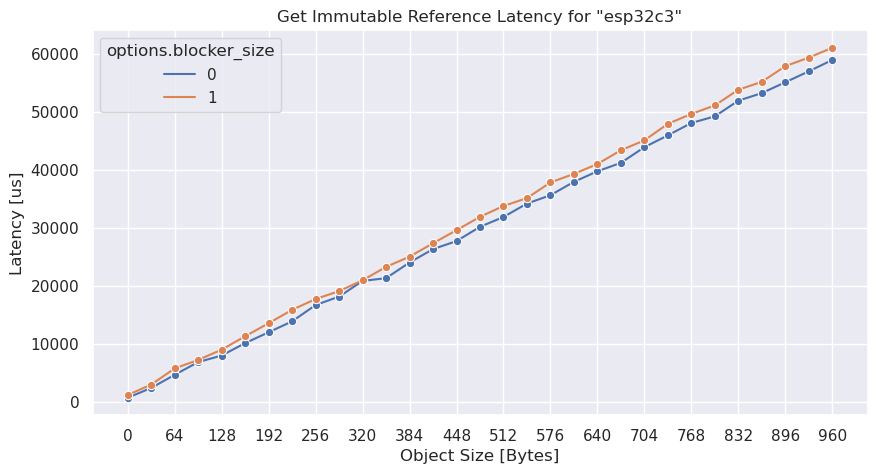

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

SELECTED_BLOCKER_SIZE = [0, 16, 96, 192, 240, 304]

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(get_max1) != 0:
    cnt = len(get_max1["options.object_size"].unique())
    sns.lineplot(ax=ax, data=get_max1, x="options.object_size", y="mean", marker="o", hue="options.blocker_size")

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")

Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

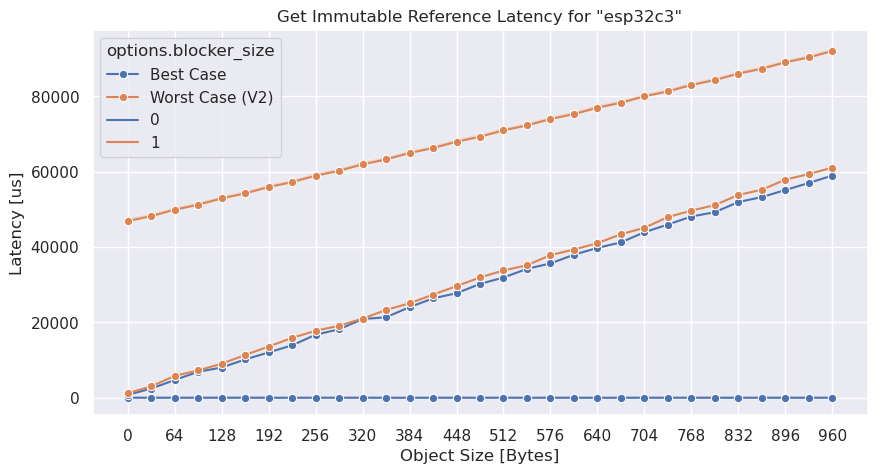

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

SELECTED_BLOCKER_SIZE = [0, 16, 96, 192, 240, 304]

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(get_min) != 0:
    sns.lineplot(ax=ax, data=get_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(get_min["options.object_size"], get_min["min"], get_min["max"], alpha=0.2, **fill_between_args)

if len(get_max2) != 0:
    sns.lineplot(ax=ax, data=get_max2, x="options.object_size", y="mean", label="Worst Case (V2)", markers=["o"], marker="o")
    ax.fill_between(get_max2["options.object_size"], get_max2["min"], get_max2["max"], alpha=0.2, **fill_between_args)

if len(get_max1) != 0:
    cnt = len(get_max1["options.object_size"].unique())
    sns.lineplot(ax=ax, data=get_max1, x="options.object_size", y="mean", marker="o", hue="options.blocker_size")

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")

Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

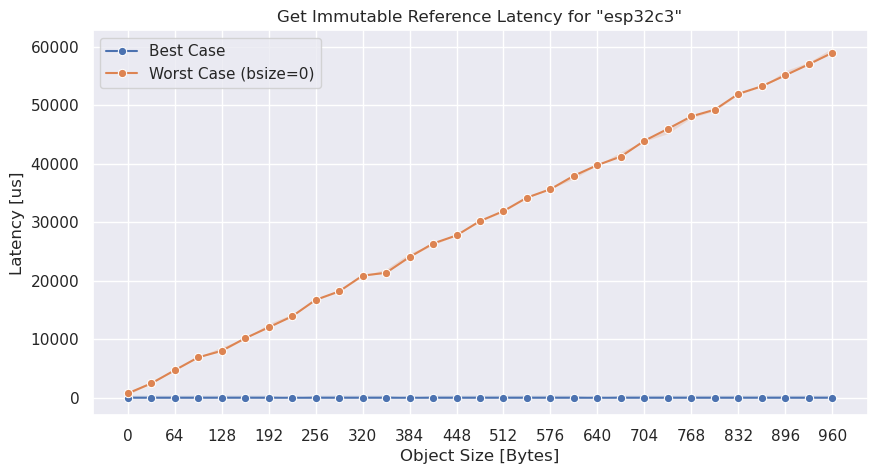

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

SELECTED_BLOCKER_SIZE = [0, 16, 96, 192, 240, 304]

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(get_min) != 0:
    sns.lineplot(ax=ax, data=get_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(get_min["options.object_size"], get_min["min"], get_min["max"], alpha=0.2, **fill_between_args)

if len(get_max1) != 0:
    for value in get_max1["options.blocker_size"].unique():
        if len(SELECTED_BLOCKER_SIZE) != 0 and value not in SELECTED_BLOCKER_SIZE:
            continue

        data = get_max1.loc[get_max1["options.blocker_size"] == value]
        sns.lineplot(ax=ax, data=data, x="options.object_size", y="mean", label="Worst Case (bsize=" + str(value) + ")", markers=["o"], marker="o")
        ax.fill_between(data["options.object_size"], data["min"], data["max"], alpha=0.2, **fill_between_args)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")

Text(0.5, 1.0, 'Get Immutable Reference Latency for "esp32c3"')

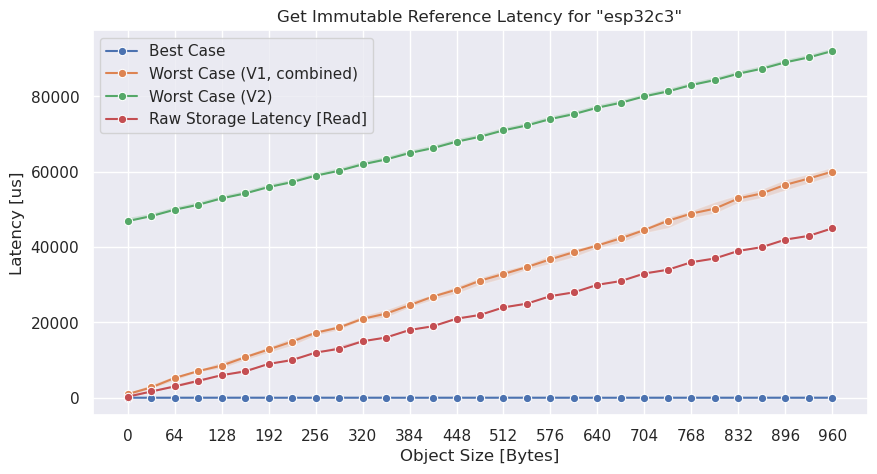

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

if len(get_min) != 0:
    sns.lineplot(ax=ax, data=get_min, x="options.object_size", y="mean", label="Best Case", markers=["o"], marker="o")
    ax.fill_between(get_min["options.object_size"], get_min["min"], get_min["max"], alpha=0.2, **fill_between_args)

if len(get_max1) != 0:
    data = get_max1.groupby("options.object_size").agg({"mean": "mean", "max": "max", "min": "min"})
    sns.lineplot(ax=ax, data=data, x="options.object_size", y="mean", label="Worst Case (V1, combined)", markers=["o"], marker="o")
    ax.fill_between(data.index, data["min"], data["max"], alpha=0.2, **fill_between_args)

if len(get_max2) != 0:
    sns.lineplot(ax=ax, data=get_max2, x="options.object_size", y="mean", label="Worst Case (V2)", markers=["o"], marker="o")
    ax.fill_between(get_max2["options.object_size"], get_max2["min"], get_max2["max"], alpha=0.2, **fill_between_args)

if len(storage_read) != 0:
    sns.lineplot(ax=ax, data=storage_read, x="options.object_size", y="mean", label="Raw Storage Latency [Read]", markers=["o"], marker="o")
    ax.fill_between(storage_read["options.object_size"], storage_read["min"], storage_read["max"], alpha=0.2, **fill_between_args)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel("Latency [us]")
ax.set_title("Get Immutable Reference Latency for \"" + get_min["machine_name"][0] + "\"")